# Requirements

In [1]:

#pip install opencv-python


# Imports

In [1]:

import cv2
import numpy as np
import matplotlib.pyplot as plt
import skimage.io as io


# Reasearch


**Can OpenCV detect everything? Or, Do I need to prepare my own pretrained model?**

> OpenCV's pre-trained Haar Cascade classifiers: **face, eye, smile, full body, pedestrian, silverware, licence plate detection**

>  https://github.com/opencv/opencv

**What pre-trained models are available?**

- pretrained YOLO model for object detection

> https://pjreddie.com/darknet/yolo/

- pretrained ImageNet models in TensorFlow and Keras

- pretrained model from Caffe Framework

- pretrained SSD model (Single shot multibox detector)

> https://github.com/tensorflow/models/blob/master/research/object_detection/g3doc/tf2_detection_zoo.md

> models pretrianed on the COCO 2017 Dataset: CenterNet HourGlass104, CenterNet Resnet50, CenterNet MobileNetV2, Efficient Det, SSD MobileNet, SSD ResNet, Faster R-CNN ResNet, Mask R-CNN ResNet, ExtremeNet

- PyTorch


# OpenCV

width: 640 pixels
height: 480 pixels
channels: 3


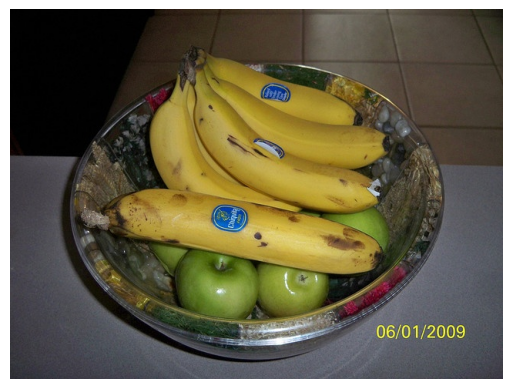

In [2]:

"""
Read the image. Show the height, width and the no. of channels.
"""

image_name = "train_image_458756.jpg"

image = cv2.imread(image_name)
image_bgr = cv2.cvtColor(image, cv2.COLOR_RGB2BGR)

height = image_bgr.shape[0]
width = image_bgr.shape[1]
no_of_color_channels = image_bgr.shape[2]

print("width: {} pixels".format(width))
print("height: {} pixels".format(height))
print("channels: {}".format(no_of_color_channels))

# cv2.imshow()
# cv2.waitKey(0)

plt.axis('off')
plt.imshow(image_bgr)
plt.show()
        

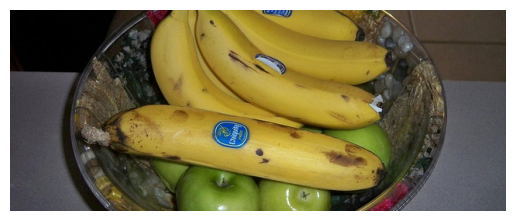

In [24]:

"""
Slovak: Urobte výrez fotografie.

EN: Crop the image.
"""

# We can accom- plish image cropping by using NumPy array slicing. 
image_numpy_array = io.imread(image_name)

# The no. of pixels: 480 x 640
# Y-axis corresponds to the height.
# X-axis corresponds to the width.

# Start y: The starting y coordinate. In this case, we start at y = 80.
# End y: The ending y coordinate. We will end our crop at y = 480.
# Start x: The starting x coordinate of the slice. We start the crop at x = 0.
# End x: The ending x-axis coordinate of the slice. Our slice ends at x = 640

start_y = 110
end_y = 370

start_x = 0
end_x = 640

image_cropped = image_numpy_array[start_y:end_y, start_x:end_x, :]

plt.axis('off')
plt.imshow(image_cropped)
plt.show()
    

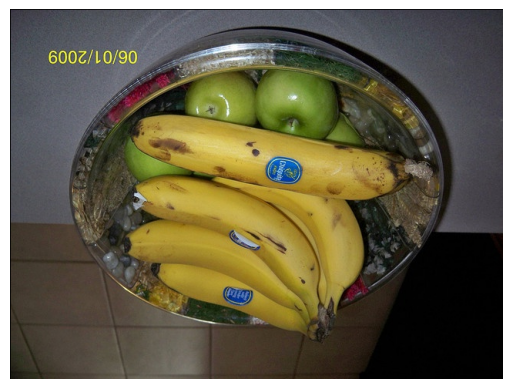

In [15]:

"""
SK: Otočte fotografiu.

EN: Rotate the image by some angle.
"""

# When we rotate an image, we need to specify around which point we want to rotate.
# In most cases, you will want to rotate around the center of an image.
center = (width//2, height//2)

# arg1 - the point at which we want to rotate the image around (in this case, the center of the image)
# arg2 - We then specify θ, the number of degrees we are going to rotate the image by.
# arg3 - The last argument is the scale of the image (resizing). 
#        A floating point value, where 1.0 means the same dimensions of the image are used. 
#        However, if you specified a value of 2.0 the image would be doubled in size.
matrix = cv2.getRotationMatrix2D(center, 180, 1.0)

image_rotated = cv2.warpAffine(image_bgr, matrix, (width, height))

plt.axis('off')
plt.imshow(image_rotated)
plt.show()


The no. of pixels: 480 x 640
The no. of pixels of the resized image: 150 x 112


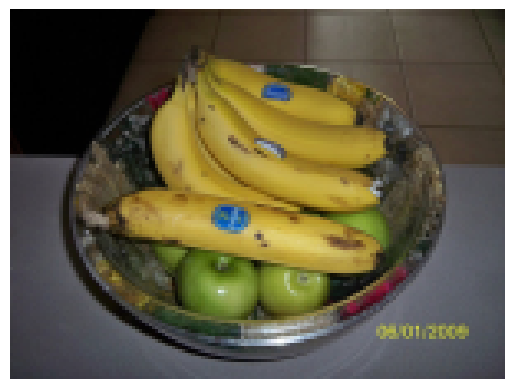

In [18]:

"""
Slovak: Zväčšite alebo zmenšite počet pixelov fotografie.

EN: Resize the image.
"""

print(f"The no. of pixels: {height} x {width}")

# The aspect ratio is the proportional relationship of the width and the height of the image.
# We define our new image width to be 150 pixels.
new_width = 150
ratio = new_width / width

# The height is then computed by multiplying the old height by our ratio and converting it to an integer.
new_dimensions = (new_width, int(height * ratio))

# The last parameter is our interpolation method, which is the algorithm working behind the scenes to handle 
# how the actual image is resized.
# other appropriate choices include cv2.INTER_LINEAR, cv2.INTER_CUBIC, and cv2.INTER_NEAREST
image_resized = cv2.resize(image_bgr, new_dimensions, interpolation = cv2.INTER_AREA)

image_resized_height = image_resized.shape[0]
image_resized_width = image_resized.shape[1]

print(f"The no. of pixels of the resized image: {image_resized_width} x {image_resized_height}")

plt.axis('off')
plt.imshow(image_resized)
plt.show()


In [ ]:

"""
SK: Urobte z farebnej čiernobielu fotografiu s aplikáciou dvoch farebných filtrov.

EN: Convert to grayscale using two filters.
"""

pass


In [2]:

"""
SK: Označte najsvetlejšie a najtmavšie miesta.

Finding the brightest spot in the image:
https://pyimagesearch.com/2014/09/29/finding-brightest-spot-image-using-python-opencv/

"""

pass 

# ### CUSTOM CANVAS ###

# image_custom_canvas = np.zeros((3, 3, 3), dtype = "uint8")

# image_custom_canvas[0, 0] = (26, 148, 49)
# image_custom_canvas[1, 0] = (26, 148, 49)
# image_custom_canvas[2, 0] = (26, 148, 49)

# image_custom_canvas[0, 1] = (135, 206, 235)
# image_custom_canvas[1, 1] = (135, 206, 235)
# image_custom_canvas[2, 1] = (135, 206, 235)

# image_custom_canvas[0, 2] = (255, 215, 0)
# image_custom_canvas[1, 2] = (255, 215, 0)
# image_custom_canvas[2, 2] = (255, 215, 0)

# # Convert the image to grayscale
# image_gray = cv2.cvtColor(image_custom_canvas, cv2.COLOR_BGR2GRAY)

# image_gray_blur = cv2.GaussianBlur(image_gray, (2, 2), 0)

# # cv2.minMaxLoc is the brightest single pixel in the entire image
# # perform a naive attempt to find the (x, y) coordinates of
# # the area of the image with the largest intensity value
# # minVal contains the smallest pixel intensity value
# (min_val, max_val, min_loc, max_loc) = cv2.minMaxLoc(image_gray_blur)

# # # Get corresponding BGR values for the locations
# # darkest_pixel_bgr = image_bgr[min_loc[1], min_loc[0]]
# # lightest_pixel_bgr = image_bgr[max_loc[1], max_loc[0]]

# # print(f"Darkest: {darkest_pixel_bgr}, lightest: {lightest_pixel_bgr}")

# cv2.circle(image_gray_blur, max_loc, 2, (255, 0, 0), 2)

# plt.axis('off')
# plt.imshow(image_gray_blur)
# plt.show()


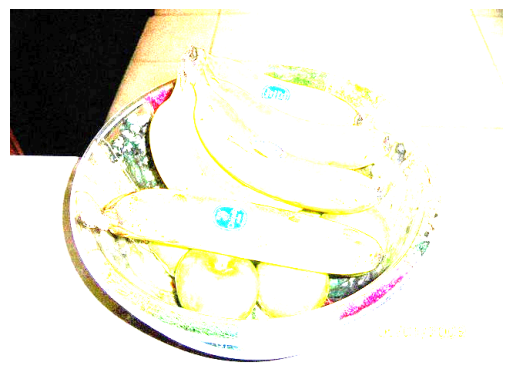

In [70]:

"""
SK: Zmeňte jas alebo kontrast fotografie.

The contrast and the brightness of an image.
https://docs.opencv.org/3.4/d3/dc1/tutorial_basic_linear_transform.html
"""

new_image = np.zeros(image_bgr.shape, image_bgr.dtype)

alpha = 8.0 # Simple contrast control
beta = 0.0    # Simple brightness control

# The np.clip function is a NumPy function that limits the values of an array to be within a specified range.
#  to perform the operation g(i,j)=α⋅f(i,j)+β
for y in range(height):
    for x in range(width):
        for c in range(no_of_color_channels):
            new_image[y,x,c] = np.clip(alpha*image_bgr[y,x,c] + beta, 0, 255)

plt.axis('off')
plt.imshow(new_image)
plt.show()


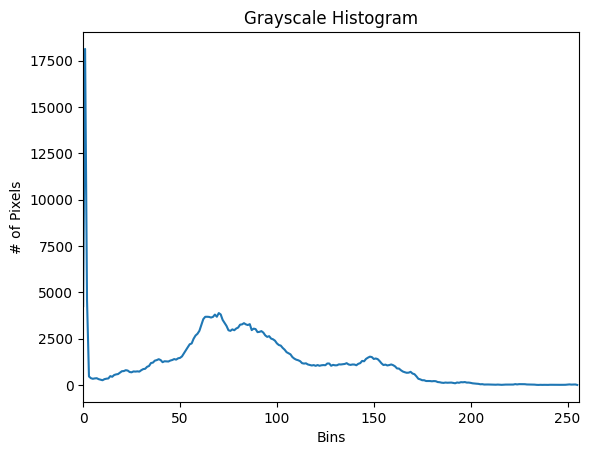

(255, 152, 0)


In [4]:

"""
SK: Spočítajte histogram jasu danej fotografie.

EN: By examining the histogram of an image, you get a general understanding regarding the contrast, brightness,
and intensity.

OpenCv: Image Histogram Calculations
By understanding the histogram, you can gain information about the image’s contrast, brightness, and overall 
tonal distribution.
So the image must contain more Black pixels if our histogram is shifted to the left (left-skewed) and the image 
must contain more White pixels if our histogram is shifted to the right (right-skewed).
https://medium.com/@sasasulakshi/opencv-image-histogram-calculations-4c5e736f85e

OpenCV Image Histograms
We use grayscale histograms for thresholding. We use histograms for white balancing. We use color histograms for 
object tracking in images, such as with the CamShift algorithm.
https://pyimagesearch.com/2021/04/28/opencv-image-histograms-cv2-calchist/
"""

# The bins (0-255) are plotted on the x-axis. 
# And the y-axis counts the number of pixels in each bin.
# Percentage calculation: pixels count / total count * 100

image_grey = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

hist = cv2.calcHist([image_grey], [0], None, [256], [0, 256])

plt.figure()
plt.title("Grayscale Histogram")
plt.xlabel("Bins")
plt.ylabel("# of Pixels")
plt.plot(hist)
plt.xlim([0, 256])
plt.show()

# Interpretation:
# black color is occuring hte most in the image
# the the grayscale values in the interval 60 - 70 are occuring the most. Let's say we will take the value 70 and convert it to the RGB by applying the color map.
grayscale_image = np.ones((1, 1), dtype=np.uint8) * 70
rgb_image = cv2.applyColorMap(grayscale_image, cv2.COLORMAP_JET)
print(tuple(rgb_image[0, 0, :]))



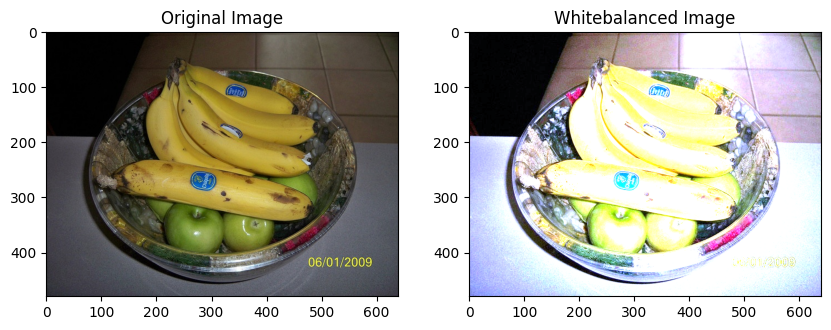

In [11]:

"""
SK: Spočítaje vyváženie bielej farby.

EN: Histogram for white balancing.

Background color detection:
https://medium.com/generalist-dev/background-colour-detection-using-opencv-and-python-22ed8655b243

Color filtering:
https://medium.com/featurepreneur/colour-filtering-and-colour-pop-effects-using-opencv-python-3ce7d4576140

Contour features:
In OpenCV finding contours is like finding white object from black background So emember objects to by found
should be white and background should be black.
https://docs.opencv.org/3.4/d4/d73/tutorial_py_contours_begin.html

OpenCV: Image Histogram Calculations
To visualize the distribution of colour values within the image, we can create a histogram.
This histogram acts as a set of bar graphs that displays the number of pixels having the same colour value. 
By comparing the heights of the bars, we can easily identify which colour values are more prominent or 
occur more frequently in the image.
https://medium.com/@sasasulakshi/opencv-image-histogram-calculations-4c5e736f85e

Image Processing with Python: Color Correction using white space Balancing Methods.
https://jmanansala.medium.com/image-processing-with-python-color-correction-using-white-balancing-6c6c749886de
"""

# white balancing algorithm
# We can use the mean intensity values from each channel to normalize the intensity values in the image
# However, it seems that the colors became too bright.

# This line calculates a white-balanced version of the image by dividing each pixel value by the mean pixel 
# value along the third axis (axis with index 0 and 1), effectively normalizing the color channels.
image_mean = (image_bgr*1.0 / image_bgr.mean(axis=(0,1)))

fig, ax = plt.subplots(1,2, figsize=(10,6))

ax[0].imshow(image_bgr)
ax[0].set_title('Original Image')

ax[1].imshow(image_mean.clip(0, 1))
ax[1].set_title('Whitebalanced Image');


array([<Axes: title={'center': 'Histogram of colors in RGB channels'}, xlabel='channel value', ylabel='fraction of pixels'>,
       <Axes: title={'center': 'Whitebalanced Image'}>], dtype=object)

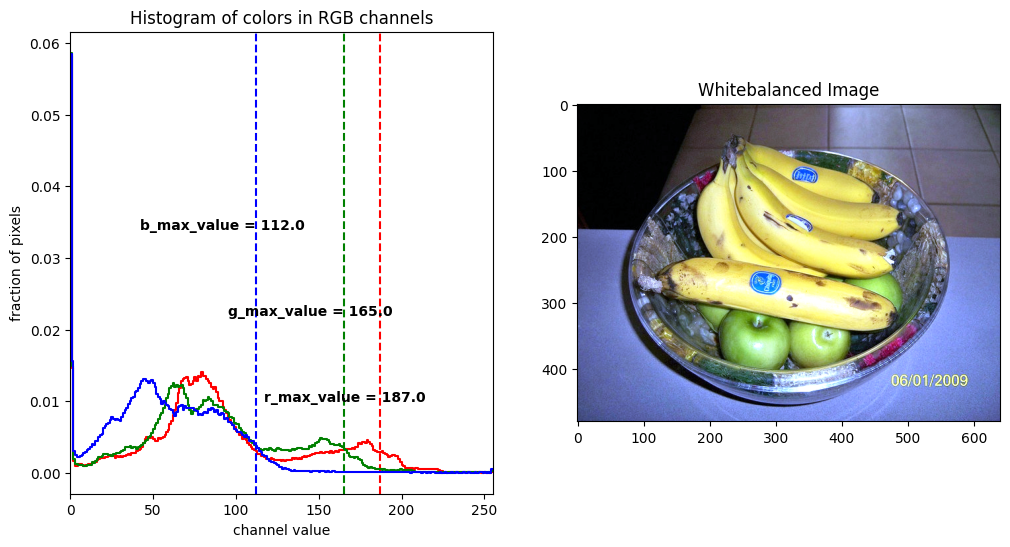

In [19]:

from skimage import img_as_ubyte

def percentile_whitebalance(image, percentile_value):
    fig, ax = plt.subplots(1,2, figsize=(12,6))
    
    # iterate over RGB in the image
    for channel, color in enumerate('rgb'):
        
        # for each channel extract the pixel values
        channel_values = image[:,:,channel]
        
        # calculate the percentile value for each channel
        value = np.percentile(channel_values, percentile_value)
        
        # plot the histogram by using 0-255 pixel vlaues on the x-axis
        # normalize bin couts as the y-axis
        ax[0].step(np.arange(256), 
                   np.bincount(channel_values.flatten(), 
                   minlength=256)*1.0 / channel_values.size, 
                   c=color)
        
        # add vertical dashed line at the calculate percentile value on the histogram
        # add a text annotation near the line
        ax[0].axvline(value, ls='--', c=color)
        ax[0].text(value-70, .01+.012*channel, 
                   "{}_max_value = {}".format(color, value), 
                    weight='bold', fontsize=10)
        
        # add axis labels and titles
        ax[0].set_xlim(0, 255)
        ax[0].set_xlabel('channel value')
        ax[0].set_ylabel('fraction of pixels');
        ax[0].set_title('Histogram of colors in RGB channels')
        
        # It calculates the white-balanced image by dividing each pixel value in the original image (image) by 
        # the corresponding percentile value along the specified axis (axis=(0, 1)). This is a form of normalization 
        # to balance the intensities of the image.
        # The result is then clipped to the range [0, 1] to ensure that pixel values remain within a valid range.
        # The img_as_ubyte() function is then used to convert the normalized image to unsigned byte format (0-255 range).
        whitebalanced = img_as_ubyte(
                (image*1.0 / np.percentile(image, 
                 percentile_value, axis=(0, 1))).clip(0, 1))
        
        ax[1].imshow(whitebalanced);
        ax[1].set_title('Whitebalanced Image')
        
    return ax

percentile_whitebalance(image_bgr, 95)

# RGB
# (80, 60, 45)


In [58]:

"""
SK: Posuňte alebo rozšírte/zúžte histogram fotografie.
"""

pass


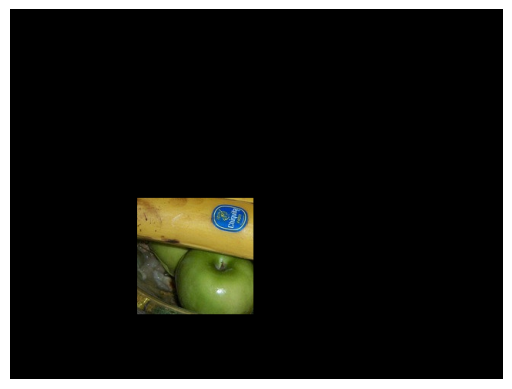

In [71]:

"""
SK: Spojte dve fotografie: jedna nech má jednofarebné pozadie a druhá sa doňho vloží.

Using a mask allows us to focus only on the portions of the image that interests us.

For example, let’s say that we were building a computer vision system to recognize faces. The only part of the image
we are interested in finding and describing are the parts of the image that contain faces – we simply don’t care 
about the rest of the content of the image. Provided that we could find the faces in the image, we might construct 
a mask to show only the faces in the image.

Our mask image – a white rectangle at the center of the image.
"""

# We construct a NumPy array, filled with zeros, with the same width and height as our image_bgr image.
mask = np.zeros(image_bgr.shape[:2], dtype = "uint8")

# In order to draw the white rectangle, we first compute the center of the image by dividing the width and 
# height by two.
(center_x, center_y) = (height // 2, width // 2)

# bitwise_and is a function that is used extensively when applying masks to images.
# A bitwise AND is true if and only if both pixels are greater than zero.
# The variable mask creates black canvas. The value of black is (0, 0, 0)
# Then we draw our white rectangle.
cv2.rectangle(mask, (center_x - 75, center_y - 75), (center_x + 75 , center_y + 75), 255, -1)

image_masked = cv2.bitwise_and(image_bgr, image_bgr, mask = mask)

plt.axis('off')
plt.imshow(image_masked)
plt.show()


# Yolo v3

In [4]:

image_id = '458756'
coco_classes = []

# Load YOLO
net = cv2.dnn.readNet("data/yolov3.weights", "data/yolov3.cfg")

# Load COCO class labels
with open("data/coco.names", "r") as f:
    coco_classes = [line.strip() for line in f]

# Load image
image = cv2.imread(f"data/train_image_{image_id}.jpg");height, width, _ = image.shape

print(height, width, _)


480 640 3


In [6]:

# Convert image to blob format
blob = cv2.dnn.blobFromImage(image, 1/255.0, (416, 416), swapRB=True, crop=False)
net.setInput(blob)


In [7]:

# This method is used to get the names of the unconnected output layers of the neural network
output_layers = net.getUnconnectedOutLayersNames()

# Run forward pass
outs = net.forward(output_layers)


In [10]:

# Information to display
class_ids = []
confidences = []
boxes = []

# Loop over each detection
for out in outs:
    for detection in out:
        scores = detection[5:]
        class_id = np.argmax(scores)
        confidence = scores[class_id]

        if confidence > 0.5:  # Adjust confidence threshold as needed
            center_x = int(detection[0] * width)
            center_y = int(detection[1] * height)
            w = int(detection[2] * width)
            h = int(detection[3] * height)

            # Rectangle coordinates
            x = int(center_x - w / 2)
            y = int(center_y - h / 2)

            boxes.append([x, y, w, h])
            confidences.append(float(confidence))
            class_ids.append(class_id)
            

In [13]:

# Apply non-maximum suppression to remove overlapping boxes
indexes = cv2.dnn.NMSBoxes(boxes, confidences, 0.5, 0.4)


In [14]:

# Draw bounding boxes on the image
for i in range(len(boxes)):
    if i in indexes:
        x, y, w, h = boxes[i]
        label = f"{coco_classes[class_ids[i]]}: {confidences[i]:.2f}"
        color = (0, 255, 0)  # Green color for the bounding box
        cv2.rectangle(image, (x, y), (x + w, y + h), color, 2)
        cv2.putText(image, label, (x, y - 5), cv2.FONT_HERSHEY_SIMPLEX, 0.5, color, 2)
        

In [15]:

# Save image
image_name = f"detected_image_{image_id}.jpg"
cv2.imwrite(f"data/{image_name}", image)


True

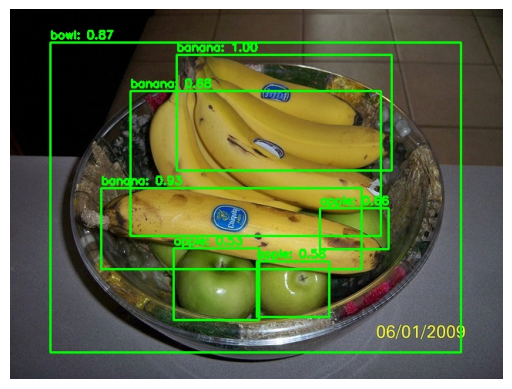

In [16]:

# load image with detected objects
image = cv2.imread("data/detected_image_458756.jpg")
image = cv2.cvtColor(image, cv2.COLOR_RGB2BGR)

plt.imshow(image)
plt.axis('off')
plt.show()


# ObjectDetector

In [27]:

class ObjectDetector:
    pass
